# **Reading the data of kepler's book: "Astronomia Nova** "

This notebook demonstrates how to **read the data**  from local machine as a data frame. Morever you can see a primary **data exploration** and **visualization**



### Import the required tools 

In [38]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import collections
import os
from itertools import permutations
from sklearn.metrics import make_scorer,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import sklearn_crfsuite  # to install this package in windows with pip please run: 'pip install sklearn-crfsuite'
from sklearn_crfsuite import metrics, scorers
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import eli5  # to install this package in windows with conda please run: 'conda install -c conda-forge eli5'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Please download the data '01_df_v013.pickle' in github on  your local machine from  this directory: vorlesung2019/notebooks/yeghaneh/data

In [6]:
importVersion = '013'  # The  desired version pickle-file of your data (now we are working on version 013 of our data)

In [7]:
path = '../data/01_df_v{0}.pickle'.format(importVersion)  # Put the path of the data in your local machine here, consider the letter "r" before the path

### Let's use data "01_df_v013" to build a NER system. 
<font size="3">The data 01_df_v013 is annotated (labeled) data of english version of well-known kepler's book: New Astronomy (Latin: Astronomia nova). You can find that in the repository.
             </font>


## **Read the data** 
<font size="3">The data  is saves as a pickle file. We read it as a pandas dataFrame. </font>

In [8]:
dfAstroNova = pd.read_pickle(path)  
type(dfAstroNova)  

pandas.core.frame.DataFrame

<font size="4"> Sort the data based on the chapters of the book 
</font>

In [9]:
dfAstroNova['chapter'] = dfAstroNova.chapter.replace("appendix b",np.nan).astype(float)  
dfAstroNova.sort_values(by='chapter' , inplace=True)
dfAstroNova.chapter.fillna('appendix b', inplace=True)

In [10]:
len(dfAstroNova)   # Number of rows.

1605

In [11]:
dfAstroNova.head(5)  

,html,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
18,"<p><span class=""anchor"" id=""bookmark0""></span>...",Chapter 1,[],[],1,[],[],[],[Chapter 1],"[[(Chapter, None), (1, NUM)]]"
34,"<p>But before that, I shall prove in this firs...","But before that, I shall prove in this first p...",[],[],1,[],[],[],"[But before that, I shall prove in this first ...","[[(But, None), (before, None), (that, None), (..."
33,<p>But since the sun's mean and apparent motio...,But since the sun's mean and apparent motions*...,[],"[Mysterium cosmographicum,]",1,[],[],[ Terms: * The sun's apparent position is that...,[But since the sun's mean and apparent motions...,"[[(But, None), (since, None), (the, None), (su..."
32,<p>Now the causes and measures of these inequa...,Now the causes and measures of these inequalit...,[],[],1,[],[],[ 5],[Now the causes and measures of these inequali...,"[[(Now, None), (the, None), (causes, None), (a..."
30,"<p>Again, however, it was noticed that these l...","Again, however, it was noticed that these loop...",[],[],1,[],[],[],"[Again, however, it was noticed that these loo...","[[(Again, None), (however, None), (it, None), ..."


In [8]:
dfAstroNova[740:745]

,html,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
594,"<p><span class=""anchor"" id=""bookmark1""></span>...","Whether the motion from the sun, like its ligh...",[{'#fn1': 'άντίφραχις.↩'}],[],35,[],[],[],"[Whether the motion from the sun, like its lig...","[[(Whether, None), (the, None), (motion, None)..."
596,"<p>And concerning the first, it is worthy of c...","And concerning the first, it is worthy of cons...",[],[],35,[],[],[],"[And concerning the first, it is worthy of con...","[[(And, None), (concerning, None), (the, None)..."
595,<p>This is a good time for me to take up the o...,This is a good time for me to take up the obje...,[],[species],35,[],[],[],[This is a good time for me to take up the obj...,"[[(This, None), (is, None), (a, None), (good, ..."
598,"<p>But it is answered, first, that the analogy...","But it is answered, first, that the analogy be...",[],[],35,[],[],[],"[But it is answered, first, that the analogy b...","[[(But, None), (it, None), (is, None), (answer..."
599,<p>On this account I would nearly separate lig...,On this account I would nearly separate light ...,[],[],35,[],[],[],[On this account I would nearly separate light...,"[[(On, None), (this, None), (account, None), (..."


In [12]:
dfAstroNova[1585:1590]

,html,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
1568,<p>{marginal: The words of the observation hav...,Consider whether the meaning could be this: t...,[],[],70,[],[],[ The words of the observation have their comm...,[Consider whether the meaning could be this: t...,"[[(Consider, None), (whether, None), (the, Non..."
1569,<p>This interpretation is furthered by the obs...,This interpretation is furthered by the observ...,[],[],70,[],[],[],[This interpretation is furthered by the obser...,"[[(This, None), (interpretation, None), (is, N..."
0,<p>Appendix B</p>,Appendix B,[],[],appendix b,[],[],[],[Appendix B],"[[(Appendix, None), (B, None)]]"
1,"<p><span class=""anchor"" id=""bookmark0""></span>...",On the Table of Oppositions in Chapter 15,[],[],appendix b,[],[],[],[On the Table of Oppositions in Chapter 15],"[[(On, None), (the, None), (Table, None), (of,..."
2,"<p>by Yaakov Zik <span style=""font-variant: sm...",by Yaakov Zik Table i:,[],[],appendix b,[],[],[],[by Yaakov Zik Table i:],"[[(by, None), (Yaakov, None), (Zik, None), (Ta..."


In [13]:
dfAstroNova.tail(5)

,html,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
13,<p>{table: appendix B t 2}</p>,,[],[],appendix b,[],[ appendix B t 2],[],[],[]
14,"<p>Kepler's table, for comparison {table: appe...","Kepler's table, for comparison",[],[],appendix b,[],[ appendix B t 3],[],"[Kepler's table, for comparison]","[[(Kepler, None), (s, None), (table, None), (f..."
15,<p>Mars from Earth to be a little greater than...,Mars from Earth to be a little greater than ha...,[{'#fn6': ' Kepler's observations yield topoce...,[],appendix b,[],[],[],[Mars from Earth to be a little greater than h...,"[[(Mars, None), (from, None), (Earth, None), (..."
16,"<p><img height=""300"" src=""media/image1.jpeg"" w...","As shown in Figure 2B, the Sun is assumed to ...",[],[],appendix b,[ appendix b gr 1],[],[],"[As shown in Figure 2B, the Sun is assumed to ...","[[(As, None), (shown, None), (in, None), (Figu..."
17,<p>The Sun moved westward and its longitude de...,The Sun moved westward and its longitude decre...,[],[4<sup>h</sup> 23<sup>m </sup>],appendix b,[],[],[],[The Sun moved westward and its longitude decr...,"[[(The, None), (Sun, None), (moved, None), (we..."


## Sort the data

## **Primary Data Exploration**

In [14]:
dfAstroNova["text"][5]    # 5th row of the data in the format of text 

"The time is measured from midnight; Gregorian dates are obtained by adding 10 days to Kepler's dates. The dates are given in old style."

In [15]:
dfAstroNova["tagged"][5] # 5th row of the data in a format (token, label). A list of lists of tuples! later position tags of the token will be added to each tuple. the tokens are chosen before by some rules.

[[('The', 'None'),
  ('time', 'None'),
  ('is', 'None'),
  ('measured', 'None'),
  ('from', 'None'),
  ('midnight', 'None'),
  ('Gregorian', 'None'),
  ('dates', 'None'),
  ('are', 'None'),
  ('obtained', 'None'),
  ('by', 'None'),
  ('adding', 'None'),
  ('10', 'NUM'),
  ('days', 'None'),
  ('to', 'None'),
  ('Kepler', 'None'),
  ('s', 'None'),
  ('dates', 'None')],
 [('The', 'None'),
  ('dates', 'None'),
  ('are', 'None'),
  ('given', 'None'),
  ('in', 'None'),
  ('old', 'None'),
  ('style', 'None')]]

In [16]:
 df = sum(dfAstroNova['tagged'], [])  # Flatt the data by removing first lists
len(df)

6699

In [17]:
df[5]  

[('Copernicus', 'None'),
 ('and', 'None'),
 ('Tycho', 'None'),
 ('followed', 'None'),
 ('Ptolemy', 'None'),
 ('carrying', 'None'),
 ('over', 'None'),
 ('his', 'None'),
 ('assumptions', 'None')]

In [18]:
df_flatten = sum(df,[])  # Flatt the data by removing the second list


In [19]:
df_flatten[0:20]  # Here we have tokens (entities) with their labels

[('Chapter', 'None'),
 ('1', 'NUM'),
 ('But', 'None'),
 ('before', 'None'),
 ('that', 'None'),
 ('I', 'None'),
 ('shall', 'None'),
 ('prove', 'None'),
 ('in', 'None'),
 ('this', 'None'),
 ('first', 'None'),
 ('part', 'None'),
 ('that', 'None'),
 ('one', 'None'),
 ('who', 'None'),
 ('substitutes', 'None'),
 ('the', 'None'),
 ('sun', 'None'),
 ('s', 'None'),
 ('apparent', 'None')]

In [20]:
len(df_flatten)  # Number of all tokens (roughly speaking all words or entities)

169231

In [21]:
tokens = [x[0] for x in df_flatten]  # Extract the tokens for further use in the frequency plot

In [22]:
labels=([x[1] for x in df_flatten])  # Extract the labels for further use in the frequency plot

In [23]:
tokens[0:5]

['Chapter', '1', 'But', 'before', 'that']

In [24]:
labels[0:5]

['None', 'NUM', 'None', 'None', 'None']

## **Visualization**

### Frequency plot of all words in all chapter of book

<font size="3">
Frequency plot of all tokens in text, as you see there is a lot 'the', 'of',... in text, they normally consider as noise, we will back to that later.
<font/>

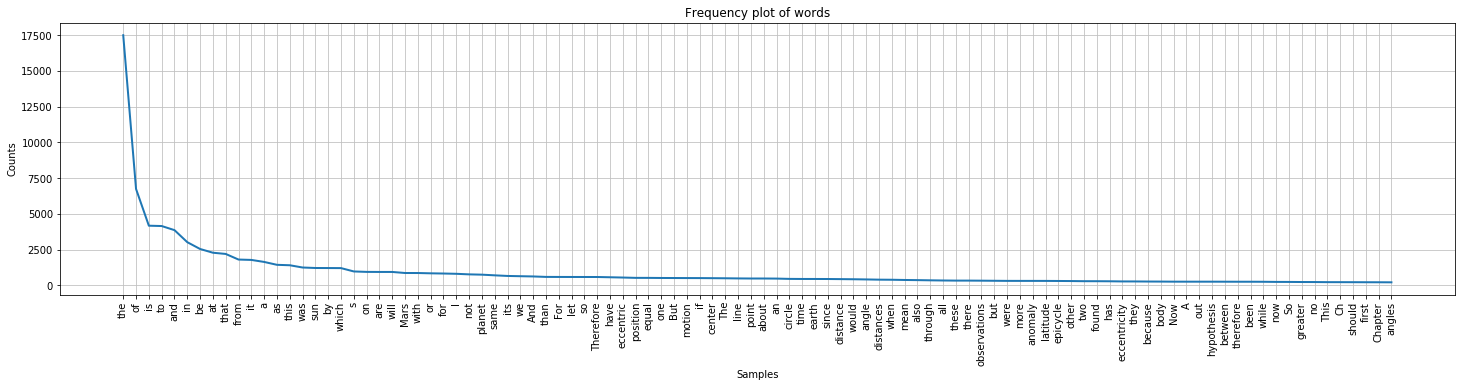

In [39]:
freqdist = nltk.FreqDist(tokens)
plt.figure(figsize=(25,5))
freqdist.plot(100, title='Frequency plot of words')


In [82]:
stop_words=["the", "of", "is", "to","And", "and","in", "be", "at", "that", "from", "it", "a","A", "as","this", "was" ,"I","l","C","B","E"]
stop_words.extend(stopwords.words('english'))
# we can consider these as stop words or we can use nltk stop words.

In [83]:
stop_words

['the',
 'of',
 'is',
 'to',
 'And',
 'and',
 'in',
 'be',
 'at',
 'that',
 'from',
 'it',
 'a',
 'A',
 'as',
 'this',
 'was',
 'I',
 'l',
 'C',
 'B',
 'E',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 '

In [84]:
# nltk stop words
from nltk.corpus import stopwords
stop_words_nltk = set(stop_words)

# List of nltk stop words {‘ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’} 


<font size="3">
We can consider these words like 'the', 'of',... as noises. so we temporary remove those! 
<font/>

In [85]:
new_tokens = []     
for w in tokens:
    if w not in stop_words_nltk: new_tokens.append(w)      

### Frequency plot of all words in all chapter of book after removing the stop words

<font size="3">
It shows word "sun" is most common word.  We can also see the word Mars, planet, eccentric as common words in the book 
<font/>

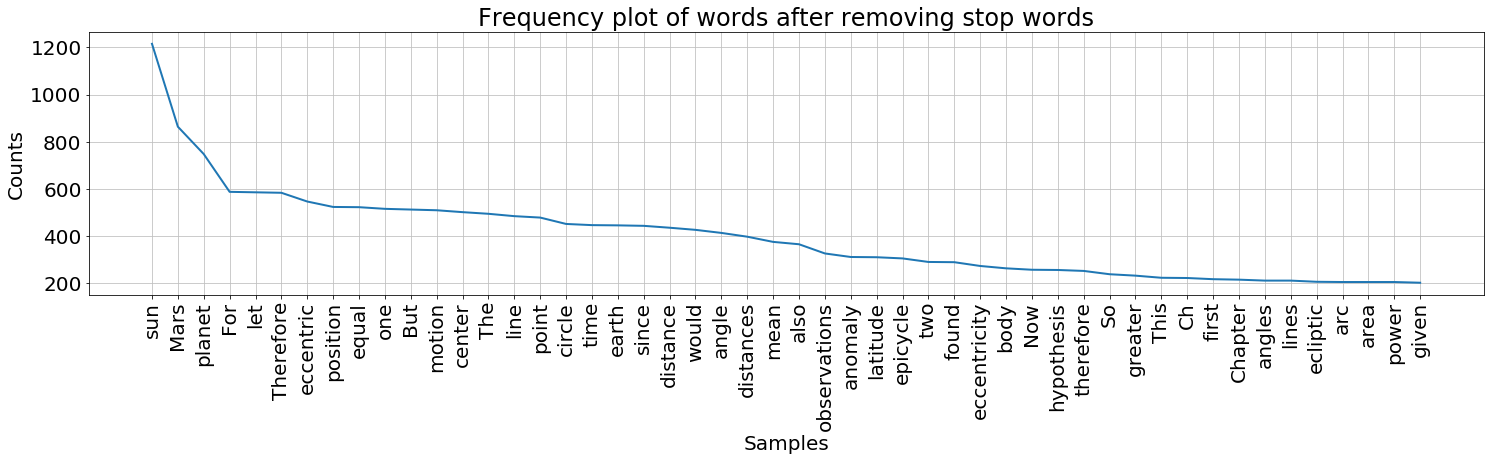

In [86]:
plt.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(25,5)) 
plt.gcf().subplots_adjust(bottom=0.15)
freqdist = nltk.FreqDist(new_tokens) 
freqdist.plot(50, title='Frequency plot of words after removing stop words')
plt.show()
fig.savefig('FrequencyplotAstronomia.png',bbox_inches = "tight")

### Bar plot of some causal words

<font size="3">
This plot shows that words "as", "for", "since" has most frequency in the book
<font/>

In [27]:
mytext = nltk.Text(tokens) 
causal_words = list([mytext.count("since"), mytext.count("as") ,mytext.count("for"), mytext.count("because"),  mytext.count("cause"), mytext.count( "raise"),  mytext.count("affects")])

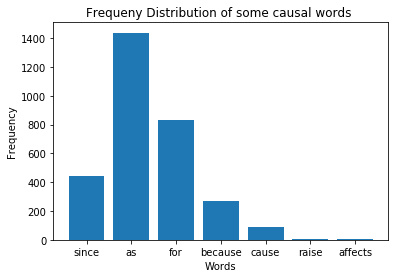

In [28]:
bar_list = plt.bar(["since", "as" , "for", "because", "cause", "raise","affects"],causal_words) 
plt.title('Frequeny Distribution of some causal words ')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### Lexical Dispesion plot of some casual words for all the chapters of the book

<font size="3">
This plot shows where the search words occur in the file which the current entry belongs to. We concentrate on some causal words
<font/>

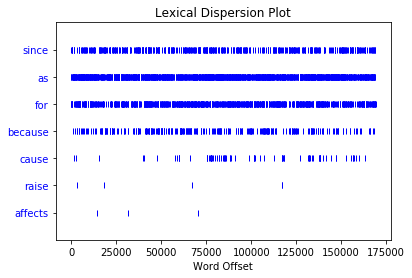

In [29]:
mytext = nltk.Text(tokens) 
mytext.dispersion_plot(["since", "as", "for", "because", "cause", "raise", "affects"])



 ### A measure of the lexical richness of the text

<font size="3">
This index can show lexical richness which  is a measure of how many tokens (individual words and punctuation) occur in a given text, divided by how many types (unique words and punctuation) occur in that same text
<font/>

In [30]:
from __future__ import division  
def lexical_diversity(text):
    a=len(text)/len(set(text))
    return a

In [31]:
lexical_diversity("mytext")

1.2

In [32]:
unique_tokens=sorted(set(mytext)) 

In [33]:
print(unique_tokens[0:5] , unique_tokens[5000:5005])  # Samples of unique tokens, see some times two numbers is considered as a token!

['0\' 33"', '0\' 9"', '000', '000,000', '014'] ['discovery', 'discredited', 'discrepancies', 'discrepancy', 'discrepant']


In [34]:
len(sorted(set(mytext))) 

9513